This files consists of Neural network implementation for Autism data

In [26]:
#Required imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf 
import seaborn as sns 
from sklearn import preprocessing, feature_selection, linear_model, ensemble
from sklearn.model_selection import train_test_split

Read autism data into pandas dataframe and display

In [27]:
autism_data =  pd.read_csv('Autism-Child-Data.csv')
autism_data

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,autism,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,0,0,1,1,0,1,0,...,m,Others,no,no,Jordan,no,5,4-11 years,Parent,NO
1,2,1,1,0,0,1,1,0,1,0,...,m,Middle Eastern,no,no,Jordan,no,5,4-11 years,Parent,NO
2,3,1,1,0,0,0,1,1,1,0,...,m,?,no,no,Jordan,yes,5,4-11 years,?,NO
3,4,0,1,0,0,1,1,0,0,0,...,f,?,yes,no,Jordan,no,4,4-11 years,?,NO
4,5,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,United States,no,10,4-11 years,Parent,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,288,1,1,1,1,1,1,1,1,1,...,f,White-European,yes,yes,United Kingdom,no,10,4-11 years,Parent,YES
288,289,1,0,0,0,1,0,1,0,0,...,f,White-European,yes,yes,Australia,no,4,4-11 years,Parent,NO
289,290,1,0,1,1,1,1,1,0,0,...,m,Latino,no,no,Brazil,no,7,4-11 years,Parent,YES
290,291,1,1,1,0,1,1,1,1,1,...,m,South Asian,no,no,India,no,9,4-11 years,Parent,YES


get shape of the data

In [28]:
autism_data.shape

(292, 22)

Check for null values or invalid patterns and replace ? with np.NaN

In [29]:
(autism_data == '?').any()
autism_data = autism_data.replace(['?'], np.NaN)

Impute the data using SimpleImputer

In [30]:
from sklearn.impute import SimpleImputer
import numpy as np

numImputer = SimpleImputer(missing_values=np.nan, strategy = 'mean')
numImputer = numImputer.fit(autism_data[['age']])
autism_data['age'] = numImputer.transform(autism_data[['age']])

catImputer = SimpleImputer(missing_values=np.nan, strategy = 'most_frequent')
catImputer = catImputer.fit(autism_data[['ethnicity','relation']])
autism_data[['ethnicity','relation']] = catImputer.transform(autism_data[['ethnicity','relation']])


Get statistical insights using describe()

In [31]:
autism_data.describe()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,146.500000,0.633562,0.534247,0.743151,0.551370,0.743151,0.712329,0.606164,0.496575,0.493151,0.726027,6.354167,6.239726
std,84.437354,0.482658,0.499682,0.437646,0.498208,0.437646,0.453454,0.489438,0.500847,0.500811,0.446761,2.349143,2.284882
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,73.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000
50%,146.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,6.000000,6.000000
75%,219.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,8.000000
max,292.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,10.000000


Get unique values count to check cardinality

In [32]:
autism_data.nunique()

id                 292
A1_Score             2
A2_Score             2
A3_Score             2
A4_Score             2
A5_Score             2
A6_Score             2
A7_Score             2
A8_Score             2
A9_Score             2
A10_Score            2
age                  9
gender               2
ethnicity           10
jaundice             2
autism               2
contry_of_res       52
used_app_before      2
result              11
age_desc             1
relation             5
Class/ASD            2
dtype: int64

Encode data to binarised form using Ordinal Encoder and Label Encoder

In [33]:
autism_data.drop(columns = 'age_desc', inplace=True, axis = 1)

ordinal_encoder = preprocessing.OrdinalEncoder()
autism_data[['gender', 'ethnicity','jaundice', 'autism','contry_of_res','used_app_before','relation']] = ordinal_encoder.fit_transform(autism_data[['gender', 'ethnicity','jaundice', 'autism','contry_of_res','used_app_before','relation']])

label_encoder = preprocessing.LabelEncoder()
autism_data['Class/ASD']= label_encoder.fit_transform(autism_data['Class/ASD'])

autism_data.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,age,gender,ethnicity,jaundice,autism,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,1,1,0,0,1,1,0,1,0,...,6.0,1.0,5.0,0.0,0.0,24.0,0.0,5,1.0,0
1,2,1,1,0,0,1,1,0,1,0,...,6.0,1.0,4.0,0.0,0.0,24.0,0.0,5,1.0,0
2,3,1,1,0,0,0,1,1,1,0,...,6.0,1.0,9.0,0.0,0.0,24.0,1.0,5,1.0,0
3,4,0,1,0,0,1,1,0,0,0,...,5.0,0.0,9.0,1.0,0.0,24.0,0.0,4,1.0,0
4,5,1,1,1,1,1,1,1,1,1,...,5.0,1.0,5.0,1.0,0.0,51.0,0.0,10,1.0,1


Get division of class values to check class imbalance

In [34]:
autism_data['Class/ASD'].value_counts()

0    151
1    141
Name: Class/ASD, dtype: int64

Plot the counts of class values using countplot from Seaborn

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


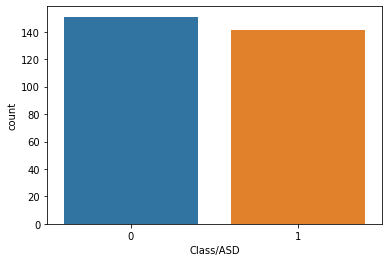

In [35]:
sns.countplot(autism_data['Class/ASD'])

Get column names

In [36]:
autism_data.columns

Index(['id', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'autism', 'contry_of_res',
       'used_app_before', 'result', 'relation', 'Class/ASD'],
      dtype='object')

Feature engineering

Drop unwanted columns

In [37]:
autism_subset = autism_data.drop(['id',
                                  'A1_Score',
                                  'A2_Score',
                                  'A3_Score',
                                  'A4_Score',
                                  'A5_Score',
                                  'A6_Score',
                                  'A7_Score',
                                  'A8_Score',
                                  'A9_Score',
                                  'A10_Score',
                                  'used_app_before',
                                  'relation'], axis=1)
autism_subset

,age,gender,ethnicity,jaundice,autism,contry_of_res,result,Class/ASD
0,6.0,1.0,5.0,0.0,0.0,24.0,5,0
1,6.0,1.0,4.0,0.0,0.0,24.0,5,0
2,6.0,1.0,9.0,0.0,0.0,24.0,5,0
3,5.0,0.0,9.0,1.0,0.0,24.0,4,0
4,5.0,1.0,5.0,1.0,0.0,51.0,10,1
...,...,...,...,...,...,...,...,...
287,7.0,0.0,9.0,1.0,1.0,50.0,10,1
288,7.0,0.0,9.0,1.0,1.0,3.0,4,0
289,4.0,1.0,3.0,0.0,0.0,8.0,7,1
290,4.0,1.0,7.0,0.0,0.0,18.0,9,1


Plot correlation matrix to check linear relationship between the variables

Text(0.5, 1.0, 'pearson correlation')

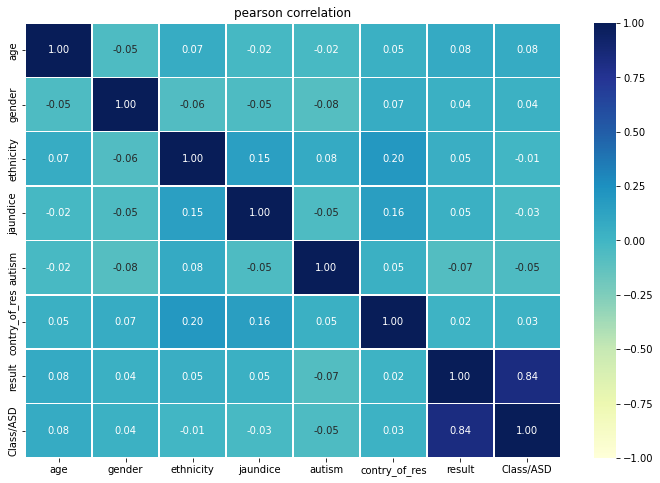

In [38]:
plt.figure(figsize = (12,8))
correlation_matrix = autism_subset.copy()
for col in correlation_matrix.columns:
    if correlation_matrix[col].dtype == "O":
         correlation_matrix[col] = correlation_matrix[col].factorize(sort=True)[0]
correlation_matrix = correlation_matrix.corr(method="pearson")
sns.heatmap(correlation_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("pearson correlation")

Perform Anova and Lasso regularization to check for contribution of features being statistically significant

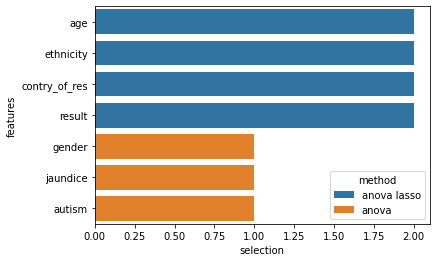

In [39]:
X = autism_subset.drop("Class/ASD", axis=1).values
y = autism_subset["Class/ASD"].values
feature_names = autism_subset.drop("Class/ASD", axis=1).columns
## Anova
selector = feature_selection.SelectKBest(score_func= feature_selection.f_classif, k=7).fit(X,y)
selected_features_anova = feature_names[selector.get_support()]

## Lasso regularization
selector = feature_selection.SelectFromModel(estimator= linear_model.LogisticRegression(C=1, penalty="l1", solver='liblinear'), max_features=7).fit(X,y)
selected_features_lasso = feature_names[selector.get_support()]
 
## Plot
autism_features = pd.DataFrame({"features":feature_names})
autism_features["anova"] = autism_features["features"].apply(lambda x: "anova" if x in selected_features_anova else "")
autism_features["num1"] = autism_features["features"].apply(lambda x: 1 if x in selected_features_anova else 0)
autism_features["lasso"] = autism_features["features"].apply(lambda x: "lasso" if x in selected_features_lasso else "")
autism_features["num2"] = autism_features["features"].apply(lambda x: 1 if x in selected_features_lasso else 0)
autism_features["method"] = autism_features[["anova","lasso"]].apply(lambda x: (x[0]+" "+x[1]).strip(), axis=1)
autism_features["selection"] = autism_features["num1"] + autism_features["num2"]
sns.barplot(y="features", x="selection", hue="method", data=autism_features.sort_values("selection", ascending=False), dodge=False)

Split the data and scale the data

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3, stratify = y, random_state = 99)

scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Build model using keras

In [41]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(7,activation = 'relu', input_shape = (7,)))
model.add(tf.keras.layers.Dense(2,activation='sigmoid'))

Compile the model 

In [42]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

Get summary of the model built

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
 dense_3 (Dense)             (None, 2)                 16        
                                                                 
Total params: 72
Trainable params: 72
Non-trainable params: 0
_________________________________________________________________


Train the model using fit method

In [44]:
class_weights = {0:1, 1:2}

history = model.fit(X_train, y_train, \
                    batch_size = 5, epochs = 100, \
                    verbose =2, class_weight = class_weights, \
                    validation_split = 0.2)

Epoch 1/100
33/33 - 1s - loss: 1.1318 - accuracy: 0.2699 - val_loss: 0.7462 - val_accuracy: 0.3902 - 681ms/epoch - 21ms/step
Epoch 2/100
33/33 - 0s - loss: 1.0867 - accuracy: 0.4294 - val_loss: 0.7591 - val_accuracy: 0.3659 - 98ms/epoch - 3ms/step
Epoch 3/100
33/33 - 0s - loss: 1.0559 - accuracy: 0.5092 - val_loss: 0.7743 - val_accuracy: 0.3902 - 98ms/epoch - 3ms/step
Epoch 4/100
33/33 - 0s - loss: 1.0339 - accuracy: 0.4847 - val_loss: 0.7835 - val_accuracy: 0.4146 - 105ms/epoch - 3ms/step
Epoch 5/100
33/33 - 0s - loss: 1.0189 - accuracy: 0.4908 - val_loss: 0.7930 - val_accuracy: 0.4390 - 98ms/epoch - 3ms/step
Epoch 6/100
33/33 - 0s - loss: 1.0060 - accuracy: 0.4969 - val_loss: 0.7982 - val_accuracy: 0.4390 - 96ms/epoch - 3ms/step
Epoch 7/100
33/33 - 0s - loss: 0.9946 - accuracy: 0.5031 - val_loss: 0.7989 - val_accuracy: 0.4390 - 94ms/epoch - 3ms/step
Epoch 8/100
33/33 - 0s - loss: 0.9842 - accuracy: 0.5031 - val_loss: 0.7987 - val_accuracy: 0.4390 - 116ms/epoch - 4ms/step
Epoch 9/100


Plot accuracy for training and validation data

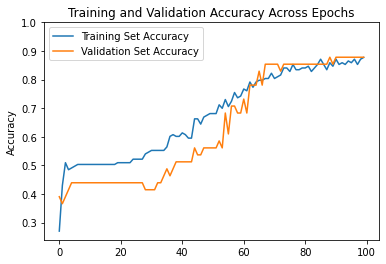

In [45]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

plt.plot(accuracy, label='Training Set Accuracy')
plt.plot(validation_accuracy, label='Validation Set Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

Plot loss for training and validation data

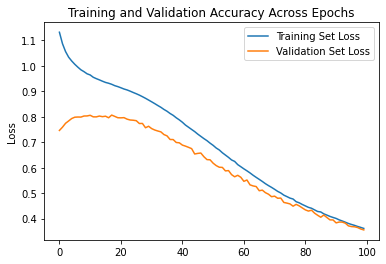

In [46]:
loss = history.history['loss'] 
validation_loss = history.history['val_loss'] 
plt.plot(loss, label='Training Set Loss') 
plt.plot(validation_loss, label='Validation Set Loss') 
plt.ylabel('Loss') 
plt.title('Training and Validation Accuracy Across Epochs') 
plt.legend()

Predict using the trained model

In [47]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)

3/3 [==============================] - 0s 2ms/step


Plot confusion matrix

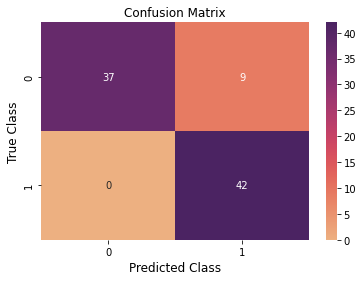

In [48]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix = confusion_matrix(y_test,y_pred) 
ax = sns.heatmap(confusion_matrix, cmap='flare',annot=True, fmt='d') 
plt.xlabel("Predicted Class",fontsize=12) 
plt.ylabel("True Class",fontsize=12) 
plt.title("Confusion Matrix",fontsize=12) 
plt.show()

Print metrics

In [49]:
from sklearn import metrics
acc = metrics.accuracy_score(y_test, y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm, '\n\n')
print('-----------------------------------------------------------')
result = metrics.classification_report(y_test, y_pred)
print('Classification Report: \n')
print(result)

accuracy:0.90


Confusion Matrix:
[[37  9]
 [ 0 42]] 


-----------------------------------------------------------
Classification Report: 

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        46
           1       0.82      1.00      0.90        42

    accuracy                           0.90        88
   macro avg       0.91      0.90      0.90        88
weighted avg       0.92      0.90      0.90        88

